In [7]:
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import time
from tensorflow.keras import preprocessing
from model.model import *
import cv2

model = tf.keras.models.load_model('./work_dir/my_model_6class_baseline.h5')
data_test = pd.read_csv('./data_dataframe/total_dataframe.csv',header=0)
to_train = math.floor(0.8*len(data_test))
to_val = math.floor(0.9*len(data_test))
choose = ['Bangs','Big_Nose','Bushy_Eyebrows','Chubby','Eyeglasses','Mustache']
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)


testing_generator = test_datagen.flow_from_dataframe(
    dataframe=data_test.iloc[to_val:],
    directory='/home/bruce/Downloads/CelebA/CelebA-20201202T065512Z-015/CelebA/Img/img_align_celeba/',
    x_col='images',
    y_col=choose,
    target_size=(300,300),
    class_mode='other',
    batch_size=64)

Found 20260 validated image filenames.


In [8]:
class_probs = model.predict_generator(testing_generator,
                              steps=len(testing_generator),
                              use_multiprocessing=True,
                              max_queue_size=128,
                              workers=8)

In [10]:
top1 = 0.0
top2 = 0.0 
filter_prob = 0.5
for i, l in enumerate(testing_generator.labels):
    class_prob = class_probs[i]
    filtered = np.where(class_prob>filter_prob, 1,0)
    top_values = (-filtered).argsort()[:2]
    
    count=0
    for k in filtered == l:
        if k==True:
            count+=1
    if count == 6:
        top1 +=1
    count_2 = 0    
    for j in np.isin(l.argsort()[:2], top_values):
        if j == True:
            count_2+=1
    if count_2 > 0:
        top2 +=1
        
print("top1 acc", top1/len(class_probs))
print("top2 acc", top2/len(class_probs))

top1 acc 0.48519249753208293
top2 acc 0.9773938795656466


In [4]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### ALL

Confusion matrix, without normalization
[[16327   777]
 [ 3002   154]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.90     17104
         1.0       0.17      0.05      0.08      3156

    accuracy                           0.81     20260
   macro avg       0.51      0.50      0.49     20260
weighted avg       0.74      0.81      0.77     20260



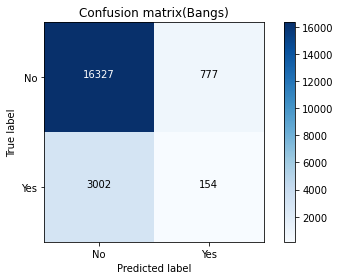

Confusion matrix, without normalization
[[15353   600]
 [ 4148   159]]
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87     15953
         1.0       0.21      0.04      0.06      4307

    accuracy                           0.77     20260
   macro avg       0.50      0.50      0.46     20260
weighted avg       0.66      0.77      0.70     20260



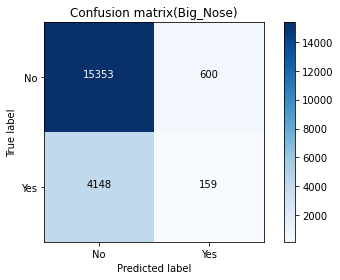

Confusion matrix, without normalization
[[17636     0]
 [ 2624     0]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     17636
         1.0       0.00      0.00      0.00      2624

    accuracy                           0.87     20260
   macro avg       0.44      0.50      0.47     20260
weighted avg       0.76      0.87      0.81     20260



/home/bruce/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


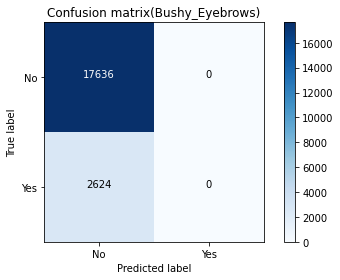

Confusion matrix, without normalization
[[19179     0]
 [ 1081     0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     19179
         1.0       0.00      0.00      0.00      1081

    accuracy                           0.95     20260
   macro avg       0.47      0.50      0.49     20260
weighted avg       0.90      0.95      0.92     20260



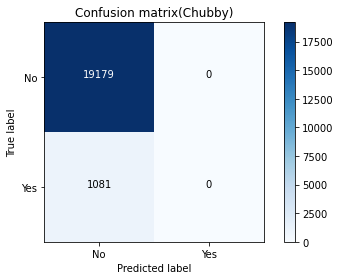

Confusion matrix, without normalization
[[18945     0]
 [ 1315     0]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     18945
         1.0       0.00      0.00      0.00      1315

    accuracy                           0.94     20260
   macro avg       0.47      0.50      0.48     20260
weighted avg       0.87      0.94      0.90     20260



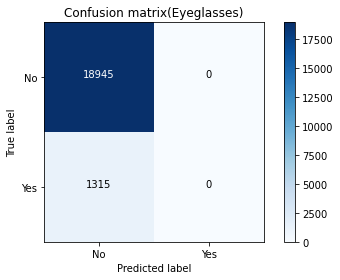

Confusion matrix, without normalization
[[19473     0]
 [  787     0]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     19473
         1.0       0.00      0.00      0.00       787

    accuracy                           0.96     20260
   macro avg       0.48      0.50      0.49     20260
weighted avg       0.92      0.96      0.94     20260



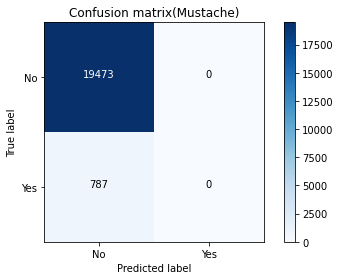

In [6]:
for num in range(0,6):
    lis_true = np.zeros([len(class_probs),1])
    lis_pred = np.zeros([len(class_probs),1])
    for i, l in enumerate(testing_generator.labels):
        class_prob = class_probs[i]
        filtered = np.where(class_prob>filter_prob, 1.0,0.0)
        lis_true[i] = l[num]
        lis_pred[i] = filtered[num]
    names=['No','Yes']
    matrix = confusion_matrix(lis_true,lis_pred)
    plot_confusion_matrix(matrix,classes=names,normalize=False,title='Confusion matrix('+choose[num]+')')
    print(classification_report(lis_true,lis_pred))
    plt.savefig('./work_dir/cf_matrix'+choose[num]+'05.png')
    plt.show()